In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import sim_data as sd
import umap

In [2]:
simulated = sd.SimulatedDataset()

In [3]:
# get a data loader
data_loader = torch.utils.data.DataLoader(simulated, batch_size=4, shuffle=True)

In [4]:
# show the first batch
for i, data in enumerate(data_loader):
    print(data[0].shape)
    break

torch.Size([4, 20000])


C:\Users\Rebeka\AppData\Local\Temp\ipykernel_18236\493946250.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


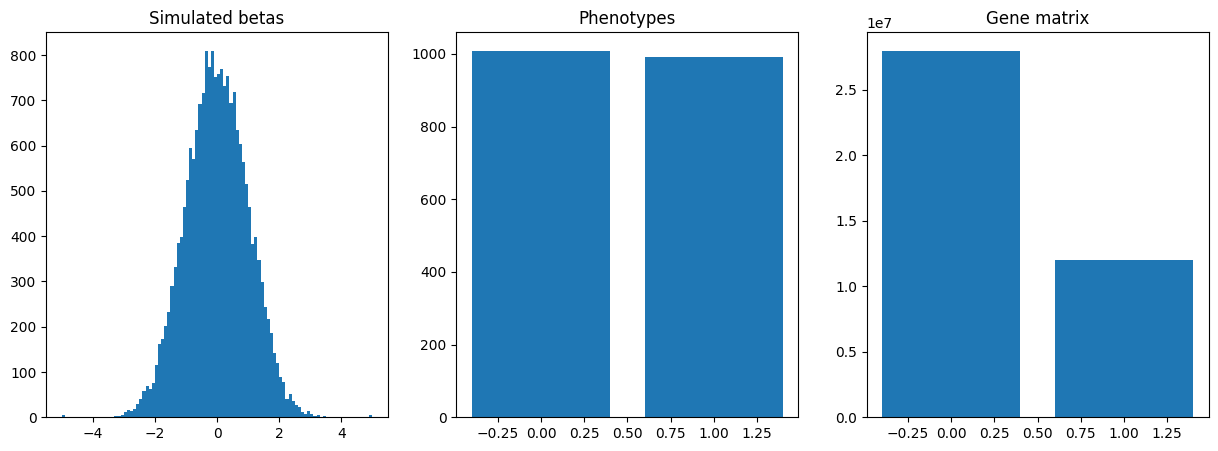

In [5]:
# visualise the dataset distributions
def plot_simulated(simulated_phenotype):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    ax[0].hist(simulated_phenotype.betas, bins=100)
    ax[0].set_title("Simulated betas")
    
    ax[1].bar(np.unique(simulated_phenotype.phenos), [np.sum(simulated_phenotype.phenos == 0), np.sum(simulated_phenotype.phenos == 1)])
    ax[1].set_title("Phenotypes")
    
    flat_g_matrix = simulated_phenotype.g_matrix.flatten()
    ax[2].bar(np.unique(flat_g_matrix), [np.sum(flat_g_matrix == 0), np.sum(flat_g_matrix == 1)])
    ax[2].set_title("Gene matrix")
    
    fig.show()
    
plot_simulated(simulated)

In [6]:
def plot_UMAP(dataset):
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    embedding = reducer.fit_transform(dataset.f_embedding)
    
    # create labels
    n_shared = dataset.repeat*2
    labels = ['blue']*n_shared + ['red']*(dataset.n_genes - n_shared)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, s=10, alpha=0.1)
    plt.colorbar(scatter, label='Cluster')
    plt.title("UMAP Projection")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.show()

C:\Users\Rebeka\anaconda3\envs\sysgen\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


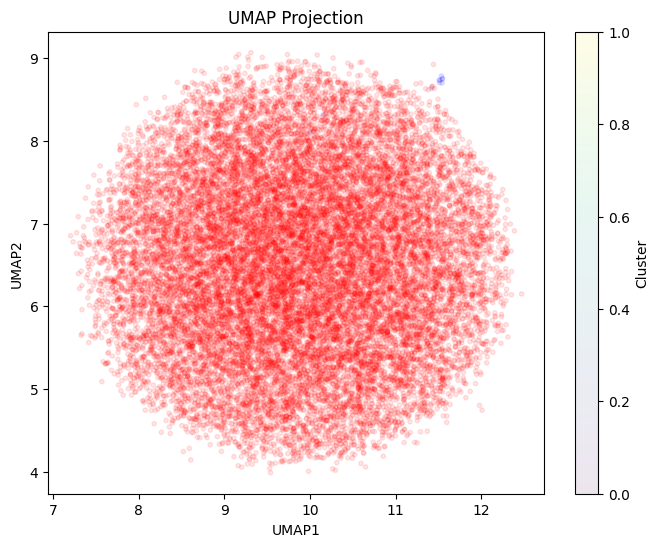

In [7]:
plot_UMAP(dataset=simulated)